# _Fundamentials of Data Analysis Project 2019_

## _Libraries Used_ 

1. **Pandas** : Pandas is king when you want to analyzing data using Python and it is one of the most popular tools to use. Pandas is open source for everyone to use. According to (McKinney, 2019) pandas was written by Wes McKinney. He also have a website http://pandas.pydata.org/ that is very useful to gain a better understanding of how and when it is used. Pandas will take in a file like CSV, TSV or SQL database and creates a python object. The important thing to remember is that Pandas is very important for anything that involves data. (YouTube, 2019)

1. **NumPy** : NumPy is another fundamental package that is needed for completing scientific computing tasks using Python. NumPy is used on arrays and the math that goes along with using those arrays for the desired outcome. It is much faster and easier to manipulate these NumPy arrays than the traditional lists and loops that we have used to this point in Python. (Towards Data Science, 2019)

1. **Seaborn** : This library is a Python visualization library based on matplotlib and It provides a high-level interface for drawing attractive statistical graphics. The role of Data Analysis is to receive a give set of data and manipulate that data that can be viewed easily or extracting key elements. (DataCamp Community, 2019)

1. **Matplotlib** : This Python library is very useful when we are generating and plotting well structured and attractive graphs in 2D. It is very easy to generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc using mathplotlib and the results can be generated from a small amount of code. Visualisation is very important when displaying data so it can be easily understood. More information on mathplotlib can be found at https://matplotlib.org/ .(Matplotlib: Python plotting — Matplotlib 3.0.3 documentation, 2019)

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import axes_style
import matplotlib.pyplot as plt
from matplotlib.pyplot import suptitle
from matplotlib import rcParams

## _Reading and Printing the CSV File_ 

_Once I downloaded the dataset I stored it in a file named tips.csv. I then needed to load that csv file so I can view the contents by using seaborn._


In [2]:
# Read CSV File
tips = sns.load_dataset("tips")

## _Summarize the Dataset_

In [3]:
#check for missing values
print(tips.isnull().values.any())

False


In [4]:
# View the first two rows of the dataset. We can see the different columns and structure of the CSV file
print(tips.head(2))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3


In [5]:
# View the last two rows of the dataset. We can see the different columns and structure of the CSV file
# Viewing the tail is a good way to check for CSV file isses. 
print(tips.tail(2))

     total_bill   tip     sex smoker   day    time  size
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2


In [6]:
# Below we can see .head(2) for the tips column + See the Shape of the Dataset  
print("The first two position in the tips column are :","\n",tips["tip"].head(2),"\n\n" "The shape of the dataset is : ", tips.shape)

The first two position in the tips column are : 
 0    1.01
1    1.66
Name: tip, dtype: float64 

The shape of the dataset is :  (244, 7)


In [7]:
# Statistical Summary, fillna(0) is used to replaced NaN
print(tips.describe(include="all").fillna(0))

        total_bill         tip   sex smoker  day    time        size
count   244.000000  244.000000   244    244  244     244  244.000000
unique    0.000000    0.000000     2      2    4       2    0.000000
top       0.000000    0.000000  Male     No  Sat  Dinner    0.000000
freq      0.000000    0.000000   157    151   87     176    0.000000
mean     19.785943    2.998279     0      0    0       0    2.569672
std       8.902412    1.383638     0      0    0       0    0.951100
min       3.070000    1.000000     0      0    0       0    1.000000
25%      13.347500    2.000000     0      0    0       0    2.000000
50%      17.795000    2.900000     0      0    0       0    2.000000
75%      24.127500    3.562500     0      0    0       0    3.000000
max      50.810000   10.000000     0      0    0       0    6.000000


In [8]:
#  How much did each sex pay towards tips at different times.  .fillna(0) is used to replaced NaN as no one had eaten.
# .unstack() is used to convert the results into a more readable format


print(tips.groupby(["sex", "smoker", "day", "time", "size"])["total_bill"].sum().unstack().fillna(0))

size                           1       2       3       4      5      6
sex    smoker day  time                                               
Male   Yes    Thur Lunch    0.00  152.47   18.71   20.53   0.00   0.00
              Fri  Lunch    8.58   25.58    0.00    0.00   0.00   0.00
                   Dinner   0.00   89.29    0.00   40.17   0.00   0.00
              Sat  Dinner   0.00  293.39  123.15  144.93  28.15   0.00
              Sun  Dinner   0.00  235.39   68.45   57.82  30.46   0.00
       No     Thur Lunch    0.00  244.22   22.82   27.20  41.19  34.30
              Fri  Dinner   0.00   34.95    0.00    0.00   0.00   0.00
              Sat  Dinner   0.00  251.38  193.72  192.63   0.00   0.00
              Sun  Dinner   0.00  349.53  156.04  302.91  20.69  48.17
Female Yes    Thur Lunch    0.00   74.95   16.47   43.11   0.00   0.00
              Fri  Lunch    0.00   39.78    0.00    0.00   0.00   0.00
                   Dinner   0.00   48.80    0.00    0.00   0.00   0.00
      

In [9]:
# below I have grouped multiple colums together for easier viewing, .fillna(0) is used to replaced NaN as no one had eaten.
# .unstack() is used to convert the results into a more readable format

print(tips.groupby(["day","time", "sex", "smoker"]).sum().fillna(0).unstack())

# Sum the total bill 
print("\n \n \n Total bill is :",tips.total_bill.sum())

                   total_bill            tip          size       
smoker                    Yes      No    Yes      No   Yes     No
day  time   sex                                                  
Thur Lunch  Male       191.71  369.73  30.58   58.83  23.0   50.0
            Female     134.53  381.58  20.93   58.49  17.0   60.0
     Dinner Male         0.00    0.00   0.00    0.00   0.0    0.0
            Female       0.00   18.78   0.00    3.00   0.0    2.0
Fri  Lunch  Male        34.16    0.00   5.70    0.00   5.0    0.0
            Female      39.78   15.98   7.98    3.00   6.0    3.0
     Dinner Male       129.46   34.95  16.23    5.00  12.0    4.0
            Female      48.80   22.75  10.80    3.25   8.0    2.0
Sat  Lunch  Male         0.00    0.00   0.00    0.00   0.0    0.0
            Female       0.00    0.00   0.00    0.00   0.0    0.0
     Dinner Male       589.62  637.73  77.74  104.21  71.0   85.0
            Female     304.00  247.05  43.03   35.42  33.0   30.0
Sun  Lunch

In [10]:
# How much did the smokers and non smokers pay towards tips.  .fillna(0) is used to replaced NaN as no one had eaten.
# .unstack() is used to convert the results into a more readable format

print(tips.groupby(["sex", "smoker", "day", "time"])["tip"].sum().unstack().fillna(0))

# Total the amount of tips
tip_tot = tips.tip.sum()

print ("\n \n Total tips : ${:.2f}".format(tip_tot))


time                Lunch  Dinner
sex    smoker day                
Male   Yes    Thur  30.58    0.00
              Fri    5.70   16.23
              Sat    0.00   77.74
              Sun    0.00   52.82
       No     Thur  58.83    0.00
              Fri    0.00    5.00
              Sat    0.00  104.21
              Sun    0.00  133.96
Female Yes    Thur  20.93    0.00
              Fri    7.98   10.80
              Sat    0.00   43.03
              Sun    0.00   14.00
       No     Thur  58.49    3.00
              Fri    3.00    3.25
              Sat    0.00   35.42
              Sun    0.00   46.61

 
 Total tips : $731.58


In [11]:
# Groups by the sex column to view the total tips and size of party
print(tips.groupby("sex").sum())

print("\n\nCount the amount of smokers and non smokers that gave a tip :","\n",tips.groupby(by = "smoker")["tip"].count())
print("\n\nTotal the amount of tips that smokers and non smokers gave :","\n",tips.groupby(by = "smoker")["tip"].sum())


        total_bill     tip  size
sex                             
Male       3256.82  485.07   413
Female     1570.95  246.51   214


Count the amount of smokers and non smokers that gave a tip : 
 smoker
Yes     93
No     151
Name: tip, dtype: int64


Total the amount of tips that smokers and non smokers gave : 
 smoker
Yes    279.81
No     451.77
Name: tip, dtype: float64


## Statistical Analysis

In [12]:
# Mean / Average  of the tips column
mean_tip = tips["tip"].mean()

# Mean / Average of the total_bill column
mean_total_bill = tips["total_bill"].mean()

# Median of the tips column
median_tip = tips["tip"].median()

# Median of the total_bill column
median_total_bill = tips["total_bill"].median()

# Mode of the tips column
mode_tip = tips["tip"].mode()

# Mode of the total_bill column
mode_total_bill = tips["total_bill"].mode()

# Max tip price
max_tip_price = max(tips["tip"])

# Minimum tip price
min_tip_price = min(tips["tip"])

# Max total tip price
max_total_bill_price = max(tips["total_bill"])

# Minimum total bill price
min_total_price = min(tips["total_bill"])

# Calculate and show statistics
print ("The maximum total bill is   : {:.2f}".format(max_total_bill_price))
print ("The minimum total bill is   : {:.2f}".format(min_total_price),"\n")

print ("The maximum tip is          : {:.2f}".format(max_tip_price))
print ("The minimum tip is          : {:.2f}".format(min_total_price),"\n")
print("Total bill is               :",tips.total_bill.sum())
print ("Total tips                  : {:.2f}".format(tip_tot),"\n\n")

print ("The mean of tip is          : {:.2f}".format(mean_tip))
print ("The mean of total bill is   : {:.2f}".format(mean_total_bill),"\n")

print ("The median of tip is        : {:.2f}".format(median_tip))
print ("The median of total bill is : {:.2f}".format(median_total_bill),"\n")

# Using [0] removed displaying the datatype(float) so it is better when viewingS. 
print ("The mode of tip is          :", (mode_tip[0]))
print ("The mode of total bill is   :", (mode_total_bill[0]))

The maximum total bill is   : 50.81
The minimum total bill is   : 3.07 

The maximum tip is          : 10.00
The minimum tip is          : 3.07 

Total bill is               : 4827.77
Total tips                  : 731.58 


The mean of tip is          : 3.00
The mean of total bill is   : 19.79 

The median of tip is        : 2.90
The median of total bill is : 17.80 

The mode of tip is          : 2.0
The mode of total bill is   : 13.42


## _Visualise The Data_

### Bivariate Plots

#### _ScatterPlot_

_A scatter plot is a two-dimensional data visualization that uses dots to represent the values obtained for different variables. These dots are plotted along the x-axis and y-axis. We use scatter plots when we want to reveal an association between two variables. This association is called a correlation (Chartio, 2019)._

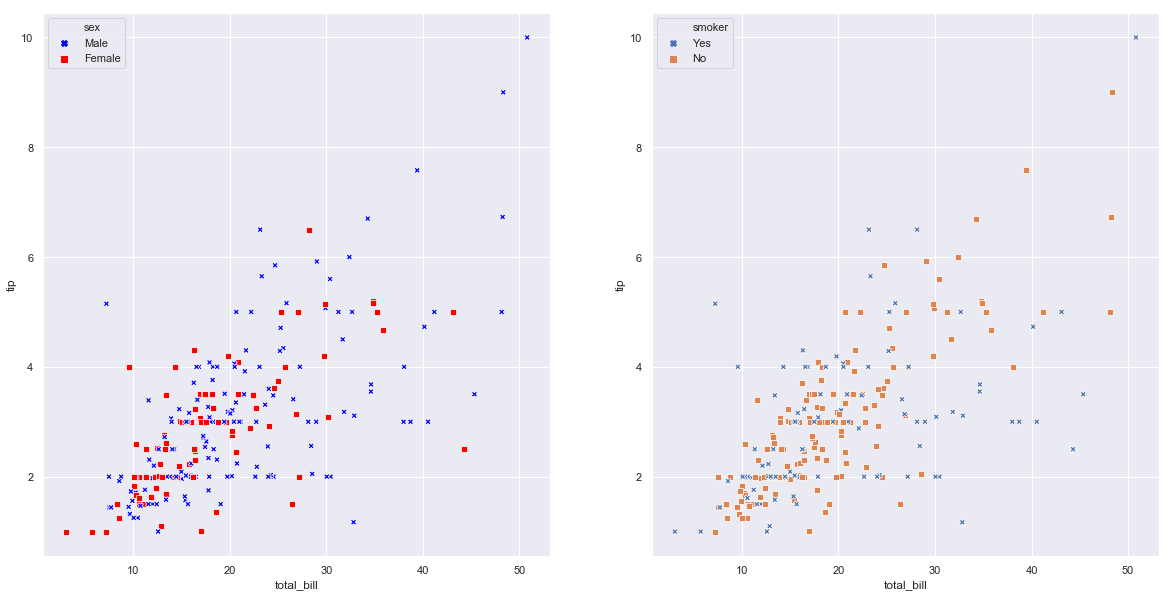

In [29]:
# ScatterPlot
colours = ["blue", "red"] # Define Plot Colours 
f, axes = plt.subplots(1, 2) # Allow me to generate graphs side by side
rcParams['figure.figsize'] = 20,9 # Set display size

markers = {"Male": "X", "Female" : "s"}
sns.scatterplot(x="total_bill", y ="tip", style ="sex", hue="sex", data=tips, palette=colours, markers= markers, ax=axes[0])

# Earlier we seen that the dataset has 93 people that smoke and 151 people dont smoke. Lets view this relationship. 
markers = {"Yes": "X", "No" : "s"}
sns.scatterplot(x="total_bill", y ="tip", style ="smoker", markers= markers, hue ="smoker",data=tips, ax=axes[1])
plt.show()

_Above I have generated two scatterplots side by side. The first scatterplots seperates Male and Female. Earlier I found the mean total bill is 19.78 and from the graphs generated we can see that a high number of tips are between two and four when the total bill is between ten and twenty. The graph on the right displays the same information but if the person is a smoker or not_

### Catplot

Description

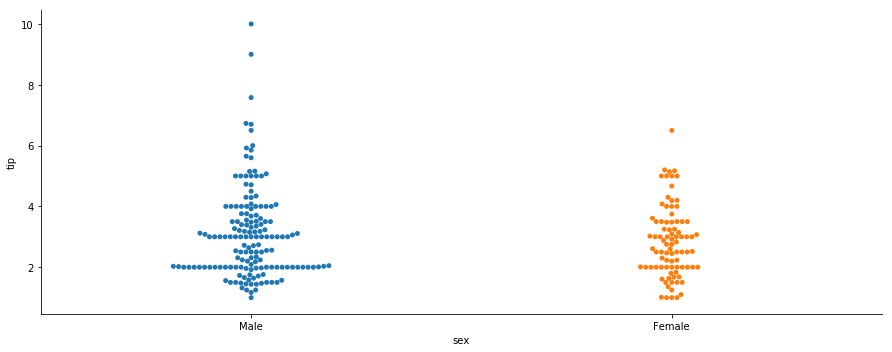

In [14]:
# Lets see the tips depending on sex
colours = ["blue", "red"] # Define Plot Colours 
# Add kind. height and aspect to position accross the page
sns.catplot(x="sex", y="tip", data=tips, kind="swarm", height=5, aspect=2.5)
plt.show()

_The catplot above separates men from women and we can see that that the tips between two and four are most frequent. This is confirming what we have viewed from the scatterplots already completed._ 

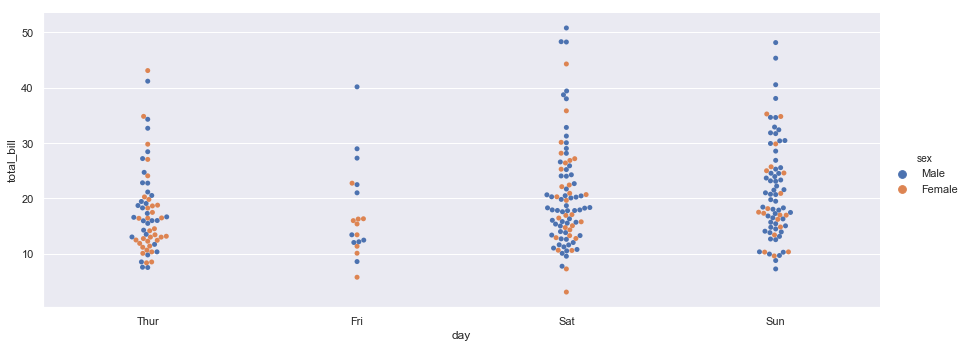

In [15]:
# Lets see the tips depending on sex
colours = ["blue", "red"] # Define Plot Colours 
sns.set(rc={'figure.figsize':(10,10)}) # Set display size
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips, height=5, aspect=2.5)
plt.show()

_The catplot above displays the days that people visited and what the total bill was. We can see that Friday was the quietest day and as expected Saturday and Sunday were the busiest days._ 

#### _Lineplot_

Description

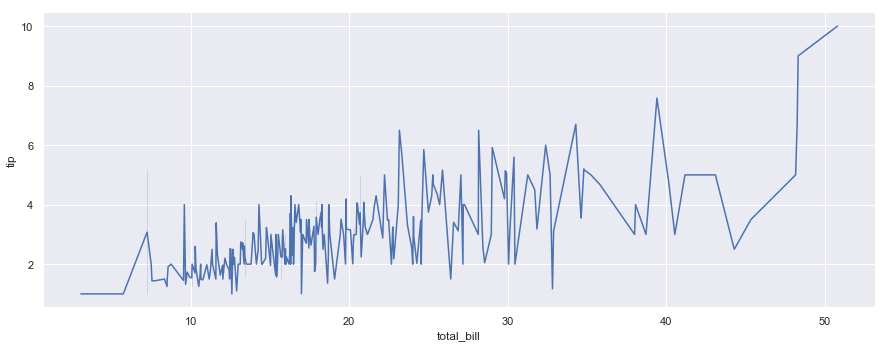

In [16]:
sns.relplot(y="tip", x="total_bill", kind="line",height=5, aspect=2.5, data=tips)
plt.show()

_The line plot above displays lines by joining all the dots together. It is difficult to take too much information from this apart from that the total bill does not exactly mean a higher tip._ 

_For example we can see that one total bill was approx 33 but the tip is below 2 (From the scatter plot above we can see that this person is male and is a smoker) and a seperate bill came in at approx 25 and the tip was just over 6. This shows that the tip is not dependent on the overall bill._

## _Univariate Plots_

#### _Histogram_

_The histogram is very useful when we want to explore our data and give us an understanding of the distribution of the data set. We can set the bin size (by default this is set to 10). It is a good idea to change the bin size as it will output the graph in different ways and might potentially display something that is hidden._I have used bin=30 and implemented the histogram using seaborn. Seaborn uses the distplot function to create histograms._

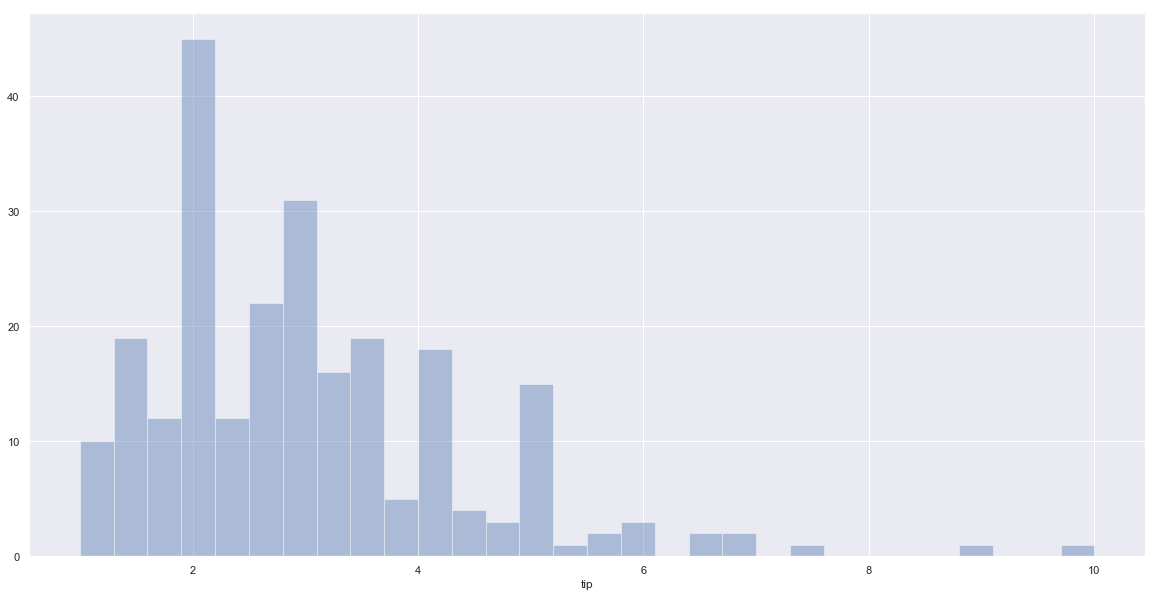

In [17]:
# Histogram, Bins allow us to view more accurate results. From the Histogram we can see that most tips are between 2 and 4 

sns.set(rc={'figure.figsize':(20,10)})
sns.distplot(tips['tip'], kde=False, bins=30)
plt.show()

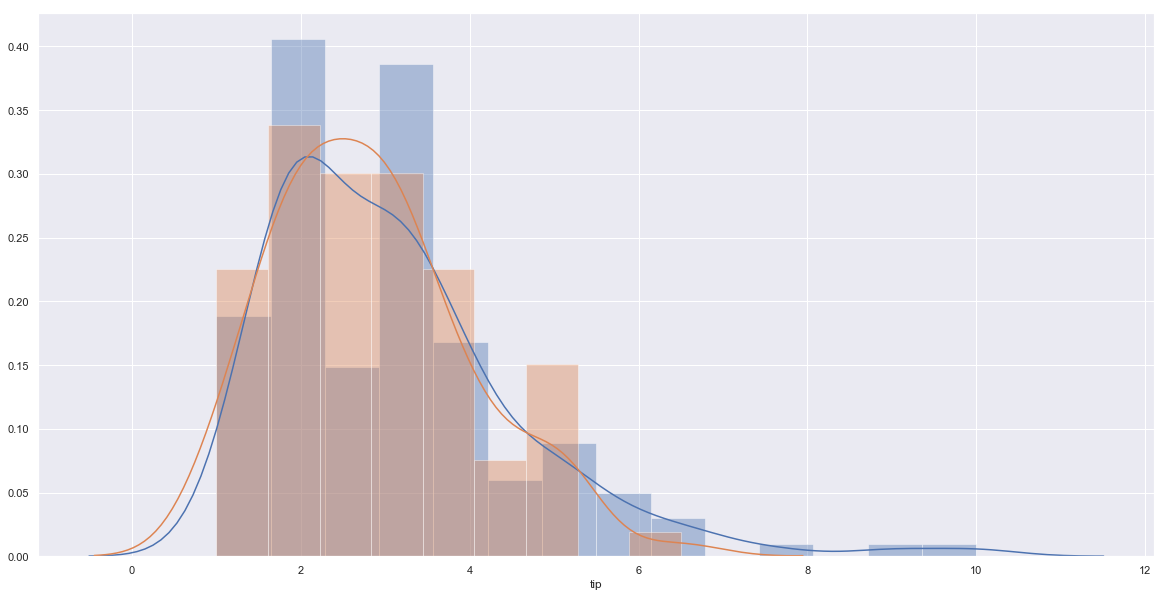

In [18]:
# Histogram to compare Male and Female

# https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

female = tips.loc[tips["sex"] == "Female", ["sex", "tip"]]
male = tips.loc[tips["sex"] == "Male", ["sex", "tip"]]

sns.set(rc={'figure.figsize':(20,10)})
sns.distplot(male["tip"])
sns.distplot(female["tip"])
plt.show()

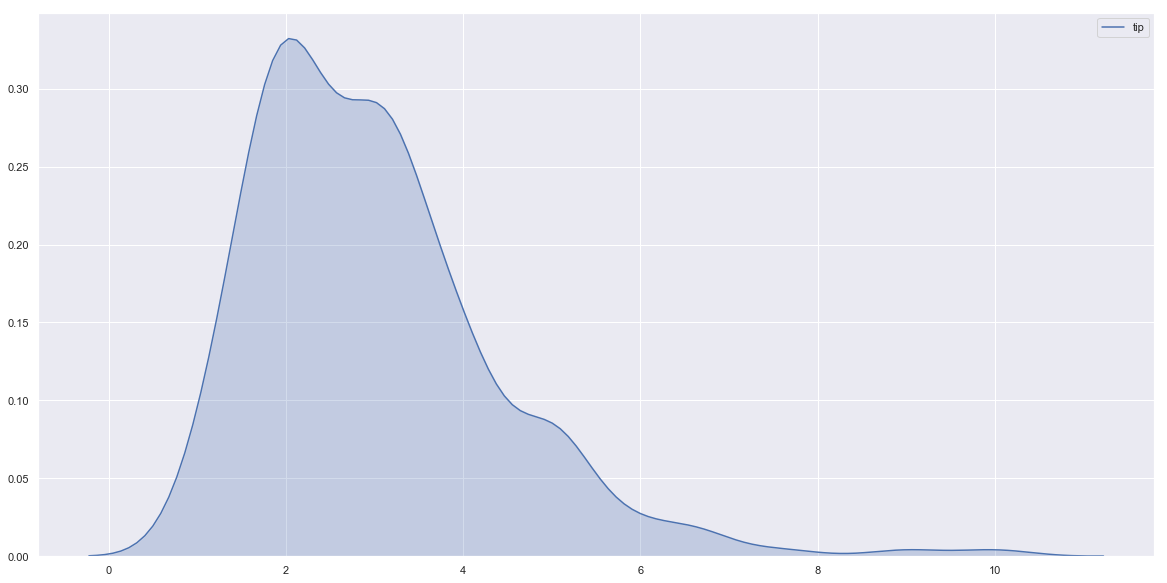

In [19]:
sns.set(rc={'figure.figsize':(20,10)})
sns.kdeplot(tips['tip'], shade=True)
plt.show()

_From the graphs we can see that two of the variables seem to indicate a bell shaped curve or normal distribution._


## Box Plot

Description

In [20]:
# Visulaise the smoker column.
print(tips.groupby(by = "smoker")["tip"].describe().T)

smoker        Yes          No
count   93.000000  151.000000
mean     3.008710    2.991854
std      1.401468    1.377190
min      1.000000    1.000000
25%      2.000000    2.000000
50%      3.000000    2.740000
75%      3.680000    3.505000
max     10.000000    9.000000


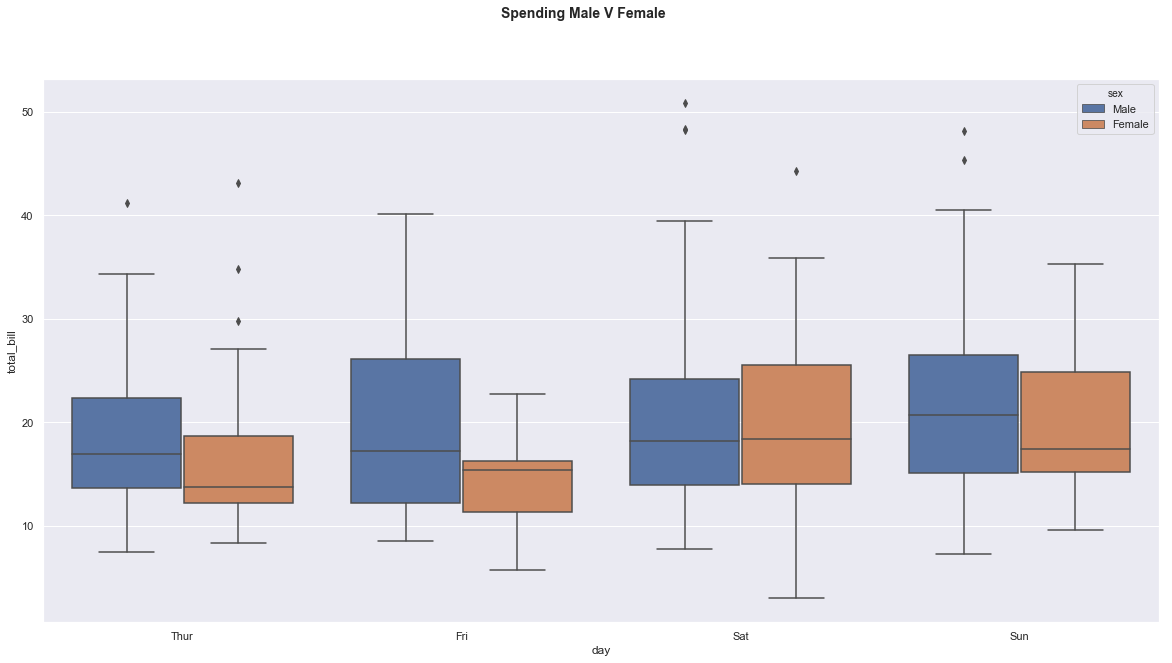

In [21]:
# Who spends more money on what days 
sns.set(rc={'figure.figsize':(20,10)})
suptitle('Spending Male V Female', fontsize=14, fontweight='bold')
sns.boxplot(x="day",y="total_bill",hue = "sex",data = tips)
plt.show()

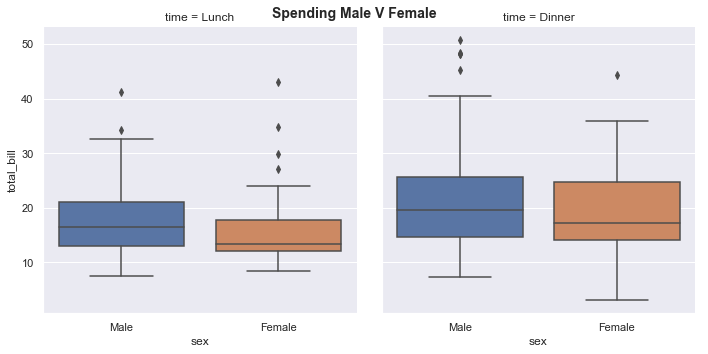

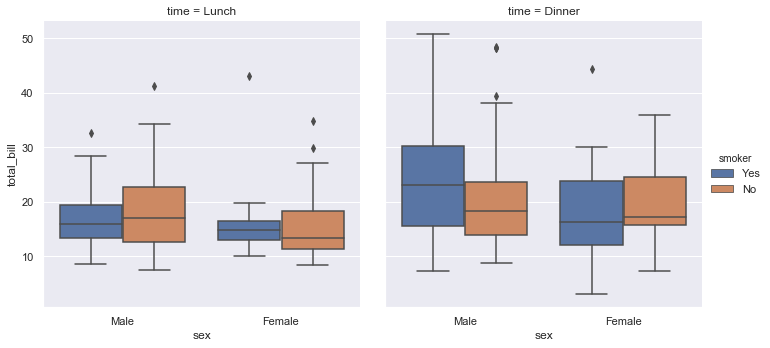

In [22]:
# Continue from the boxplot above and see Dinner V Lunch

# View based on sex
sns.catplot(x="sex", y="total_bill",col="time",data=tips, kind="box")

# View based on sex and if smoker
suptitle('Spending Male V Female', fontsize=14, fontweight='bold')
sns.catplot(x="sex", y="total_bill",hue="smoker", col="time",data=tips, kind="box")
plt.show()

## Break the Dataset representing the different days
###  linear relationships using regplot and lmplot
_The Two main features in Seaborn to visualize the linear relationships determined by regression are regplot() and lmplot() and are closely related and share most of the core functionality. However, it's important to understand how they are different. The two functions plot a scatter plot of two variables x and y, then fit the regression model y~x and plot the regression line and 95% confidence interval for the regression line_ (Tutorialspoint.com, 2019)

_In this section I will break down each of the four days and investigate the results. The results from the regplot() and lmplot() will look very similar, the main difference is a slight difference in shape of the graph._

_How the relationship changes between these two variables change when we add a third variable is the difference between regplot() and lmplot(). regplot() always shows a single relationship, lmplot() combines regplot() with FacetGrid to provide a simple interface that displays linear regression. According to (Tutorialspoint.com, 2019), "The FacetGrid class helps in visualizing the distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels."_ 




### Thursday :

In [23]:
# Refresh what the column headings are
print(tips.head(1)) # View the first two rows of the dataset

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2


In [24]:
# See how many people attended on Thursday.
# tips.loc[tips["day"]=="Fri"].sum  - Returns too much information.

print(tips.groupby("day").size())

day
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64


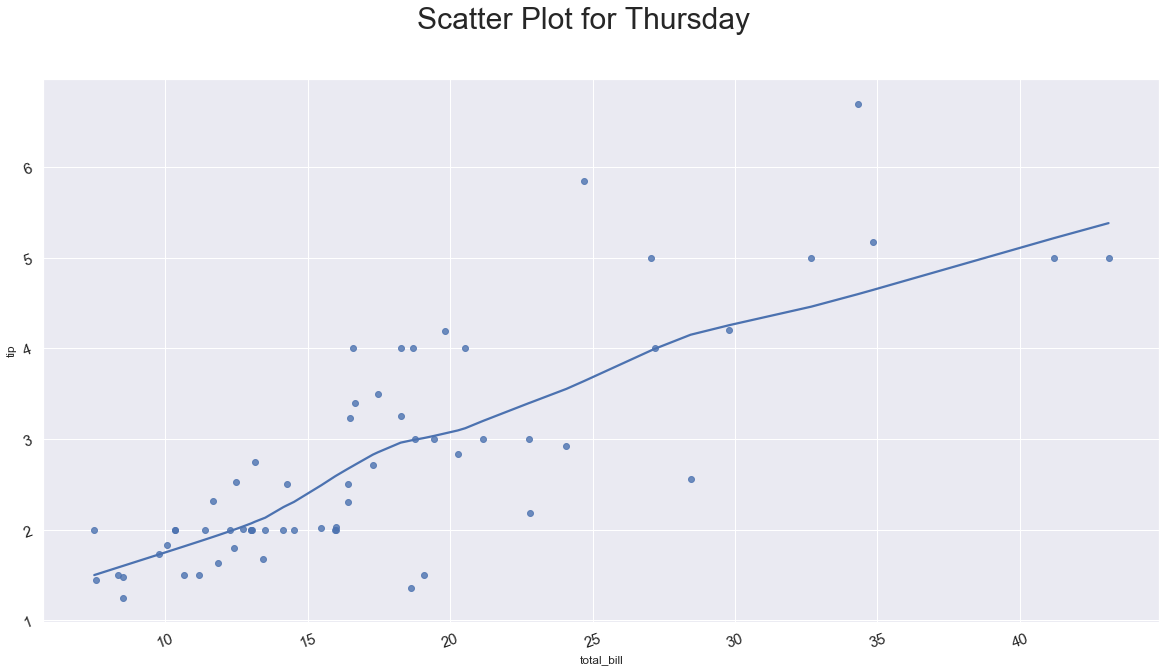

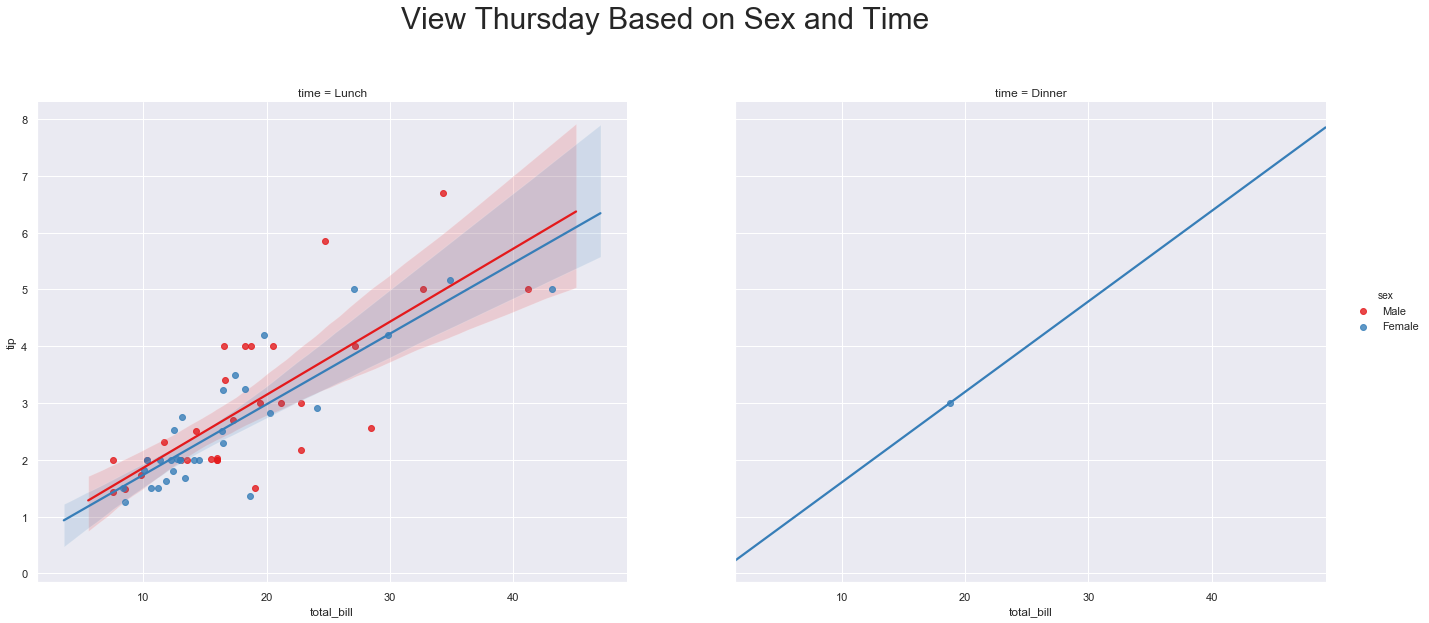

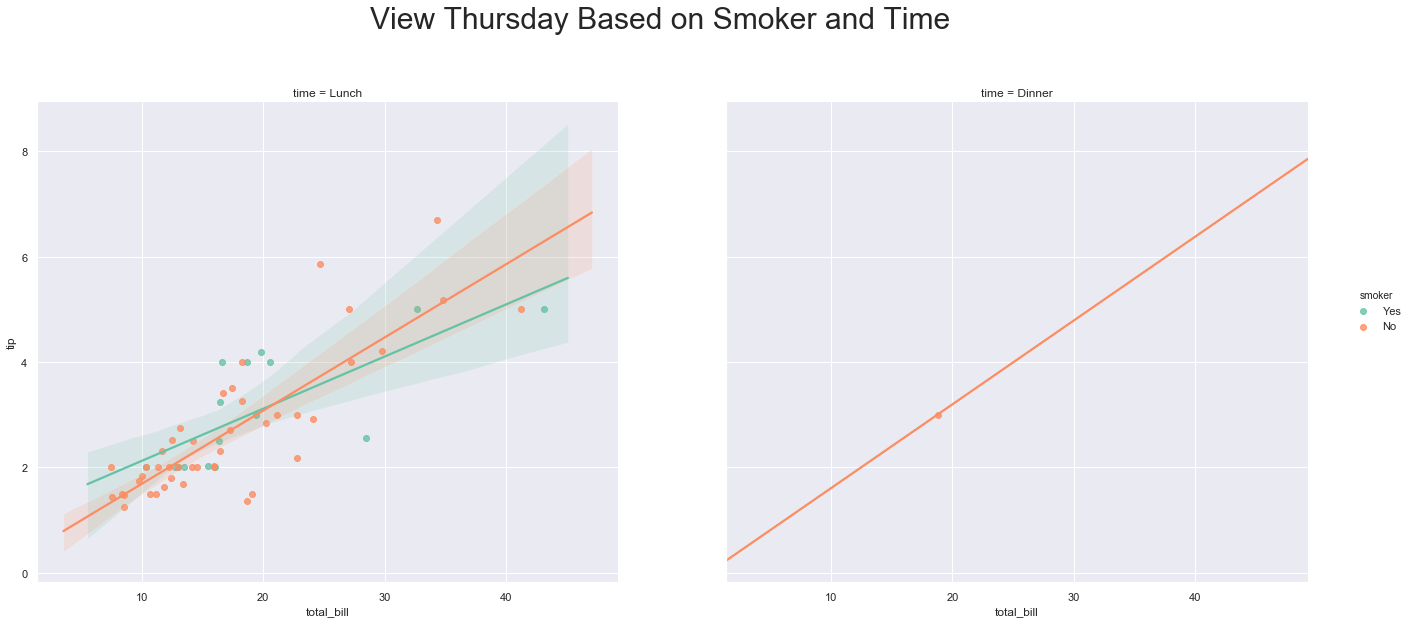

In [25]:
# Pull data on different days, plot one by one and investigate
thur= tips [tips ['day'] == "Thur"]

# Plot regplot for Thursday

plt.suptitle("Scatter Plot for Thursday", fontsize = 30) # Add Title
plt.xlabel("Total_Bill")               # Add Label
plt.ylabel("Tip")                      # Add Label
plt.xticks(fontsize=15, rotation=20)
plt.yticks(fontsize=15, rotation=20)

x1 = thur.iloc[:,1] # Use Column 1 (tip)
y1 = thur.iloc[:,0] # Use column 0 (total_bill)


#  linear relationship as determined using regplot
thursday = sns.regplot(y1,x1, lowess=True)



# linear relationship as determined using lmplot

# lmplot to view data on thursday based on sex and time
sns.lmplot(x="total_bill", y="tip", hue ="sex", data=thur, col="time", palette="Set1", height=10, 
           aspect=1).fig.suptitle("View Thursday Based on Sex and Time ",fontsize=30)
plt.tight_layout(8) # Add space between plots
 
# lmplot to view data on thursday based on smoker and time
sns.lmplot(x="total_bill", y="tip", hue ="smoker", data=thur, col="time", palette="Set2", height=10, 
           aspect=1).fig.suptitle("View Thursday Based on Smoker and Time", fontsize=30)
plt.tight_layout(8) # Add space between plots

plt.show()

In [219]:
# Double check that dinner booking of 1 is correct
print(thur.groupby(["sex", "time", "size"])["time"].count().unstack().fillna(0))

size             1     2    3    4    5    6
sex    time                                 
Male   Lunch   0.0  24.0  2.0  2.0  1.0  1.0
Female Lunch   1.0  23.0  2.0  3.0  0.0  2.0
       Dinner  0.0   1.0  0.0  0.0  0.0  0.0


The above graphs have broken down Thursday and we can see from the scatter plot that just like my results earlier showing that most tips are within the range of two and four. It is interesting to note that they one had one booking of two for dinner. More data would need to be collected to see if this is a regular occurrence because it would bot be cost effective paying bills and wages if they are not popular during dinner time. 

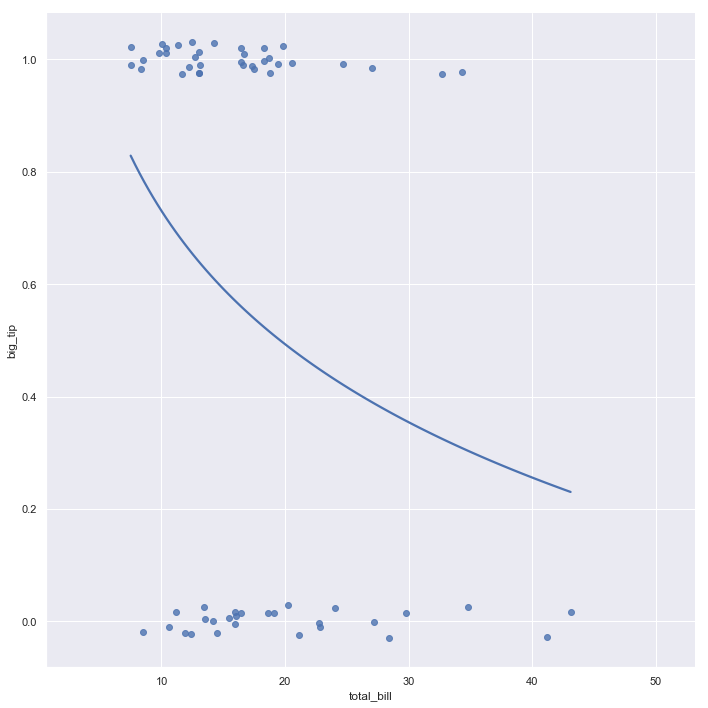

In [220]:
# Used lmplot to view a logistic regression model for a dinary dependent variable. 
# Used to view if someone did or didnt leave a big tip.

# Add new column called big tip that is over 15%
x = thur.total_bill


tips["big_tip"] = (thur.tip / thur.total_bill) > .15
y = (tips["big_tip"].astype(float)) # Convert type 'O' to a float using .astype(float)

#Truncate is used to start and stop the linear regression when the points begin and end
sns.lmplot(x="total_bill", y="big_tip", logx=True, y_jitter=.03,data=tips, height=10, aspect=1, ci=None, truncate=True)
plt.show()


### Friday :

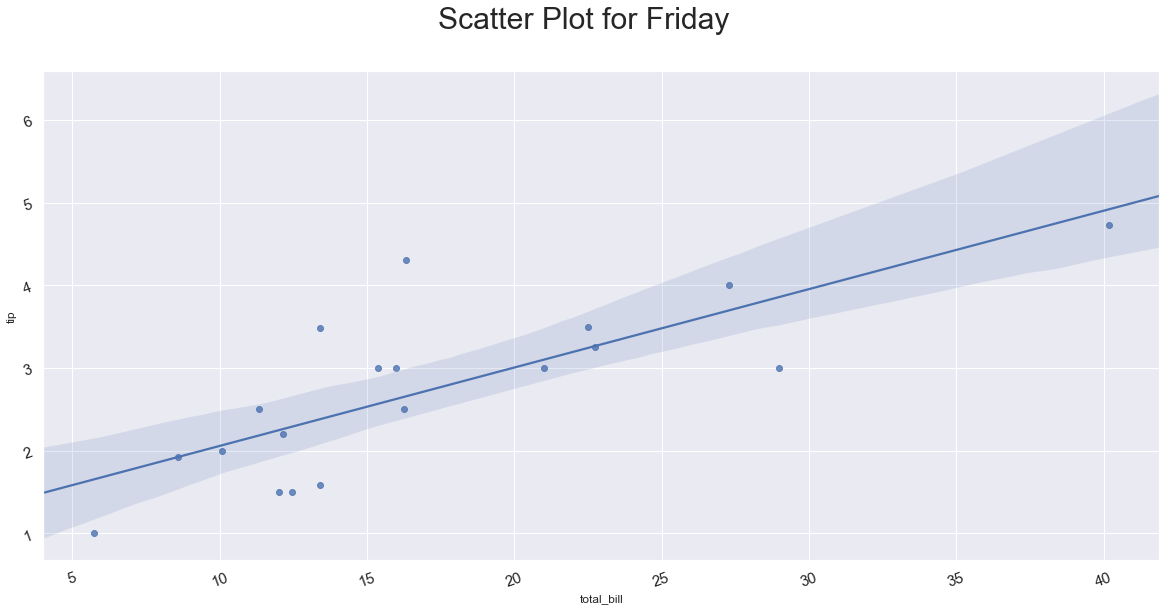

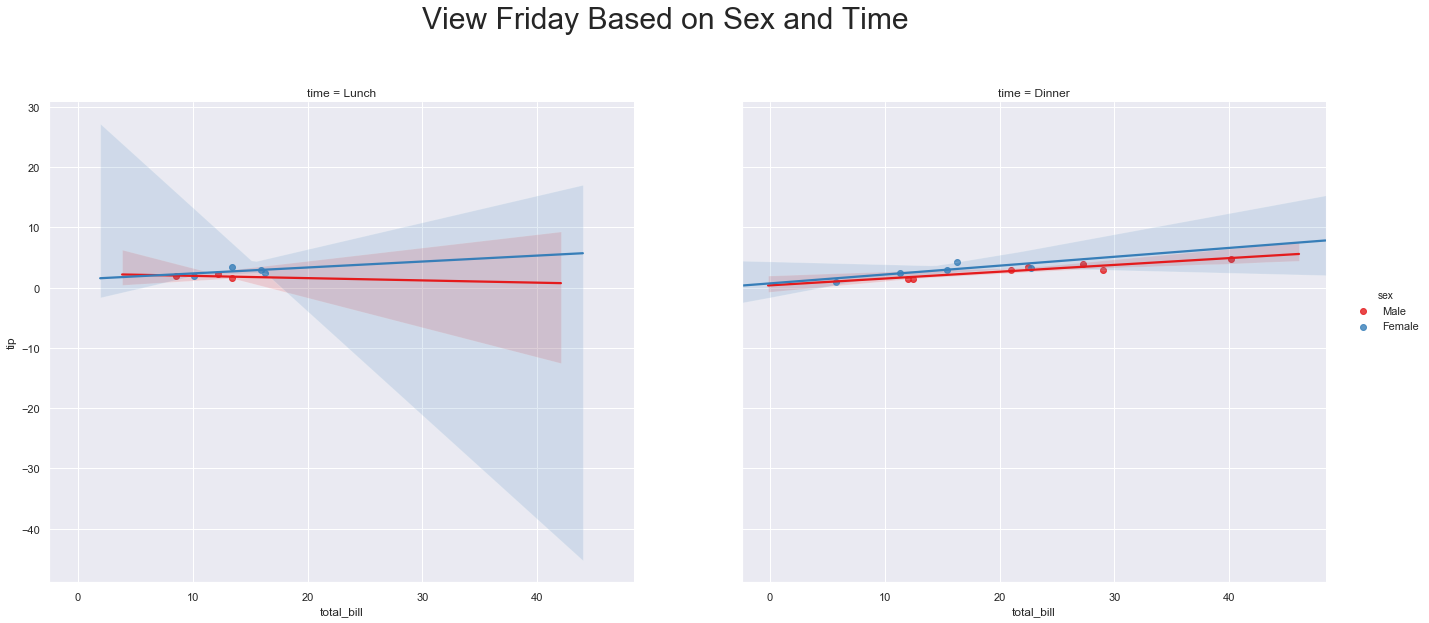

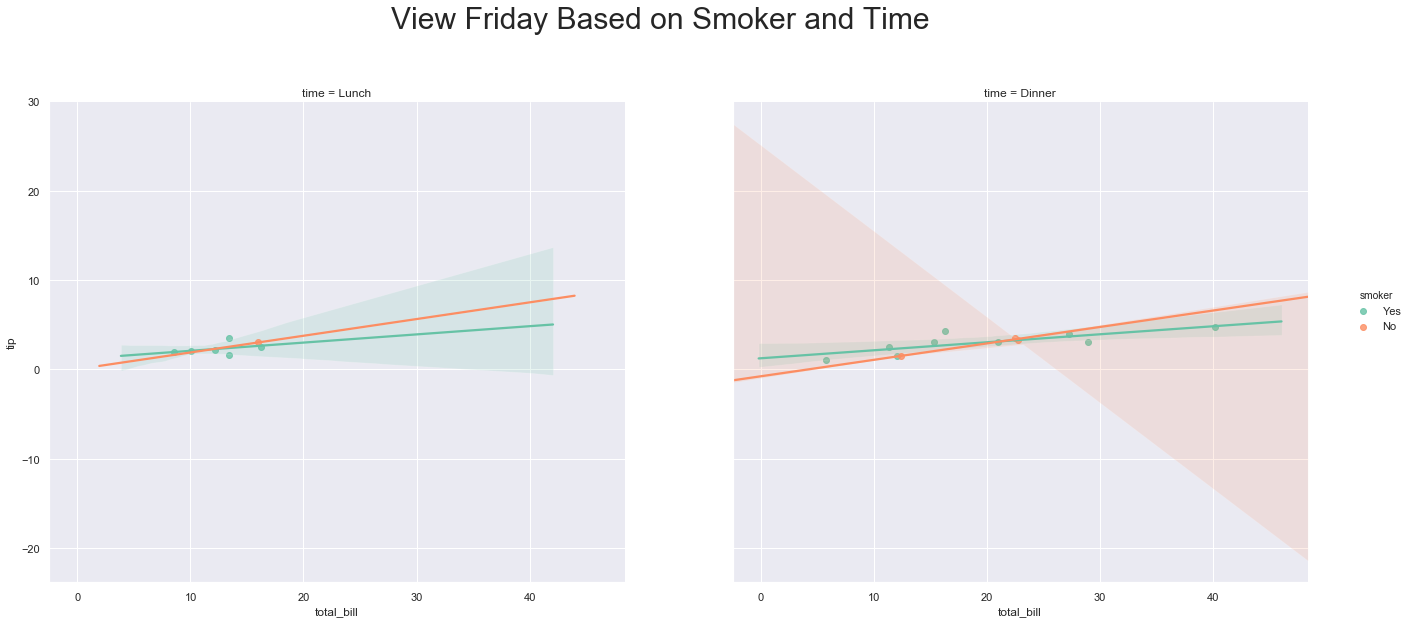

In [221]:
# Pull data on different days, plot one by one and investigate
fri = tips [tips ['day'] == "Fri"]

# Plot Friday

plt.suptitle("Scatter Plot for Friday", fontsize = 30) # Add Title
plt.xlabel("Total_Bill")               # Add Label
plt.ylabel("Tip")                      # Add Label
plt.xticks(fontsize=15, rotation=20)
plt.yticks(fontsize=15, rotation=20)

x1 = fri.iloc[:,1] # Use Column 1 (tip)
y1 = fri.iloc[:,0] # Use column 0 (total_bill)


#  linear relationship as determined using regplot
friday = sns.regplot(y1,x1)



# Linear regression using lmplot

# lmplot to view data on Friday based on sex and time
sns.lmplot(x="total_bill", y="tip", hue ="sex", data=fri, col="time", palette="Set1", height=10, 
           aspect=1).fig.suptitle("View Friday Based on Sex and Time ",fontsize=30)
plt.tight_layout(8) # Add space between plots
 
# lmplot to view data on Friday based on smoker and time
sns.lmplot(x="total_bill", y="tip", hue ="smoker", data=fri, col="time", palette="Set2", height=10, 
           aspect=1).fig.suptitle("View Friday Based on Smoker and Time", fontsize=30)
plt.tight_layout(8) # Add space between plots

plt.show()

In [224]:
# 
print(fri.groupby(["sex", "time", "size"])["time"].count().unstack().fillna(0))

size             1    2    3    4
sex    time                      
Male   Lunch   1.0  2.0  0.0  0.0
       Dinner  0.0  6.0  0.0  1.0
Female Lunch   0.0  3.0  1.0  0.0
       Dinner  0.0  5.0  0.0  0.0


We can see that Friday is a busier day with both lunch and dinner.




,,

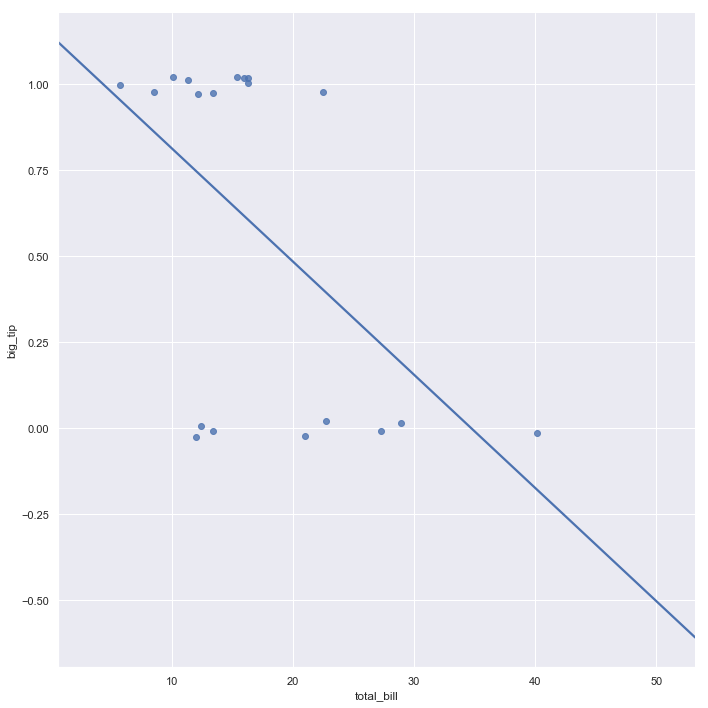

In [225]:
# Used lmplot to view a logistic regression model for a dinary dependent variable. 

tips["big_tip"] = (fri.tip / fri.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", y_jitter=.03, data=tips, height=10, aspect=1, ci=None)
plt.show()

## Saturday

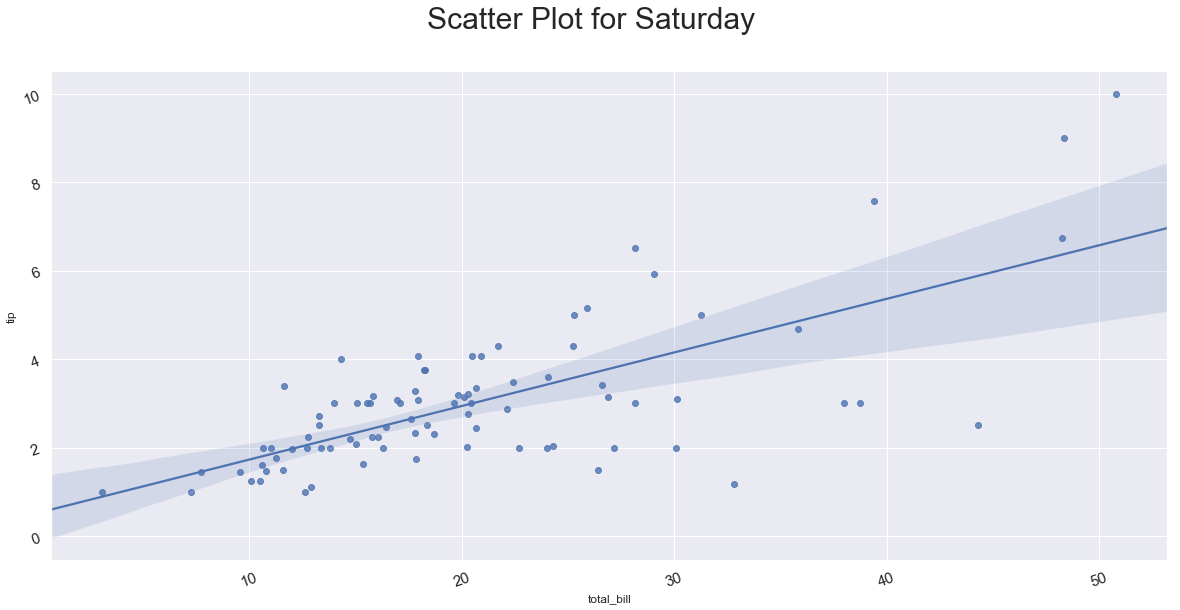

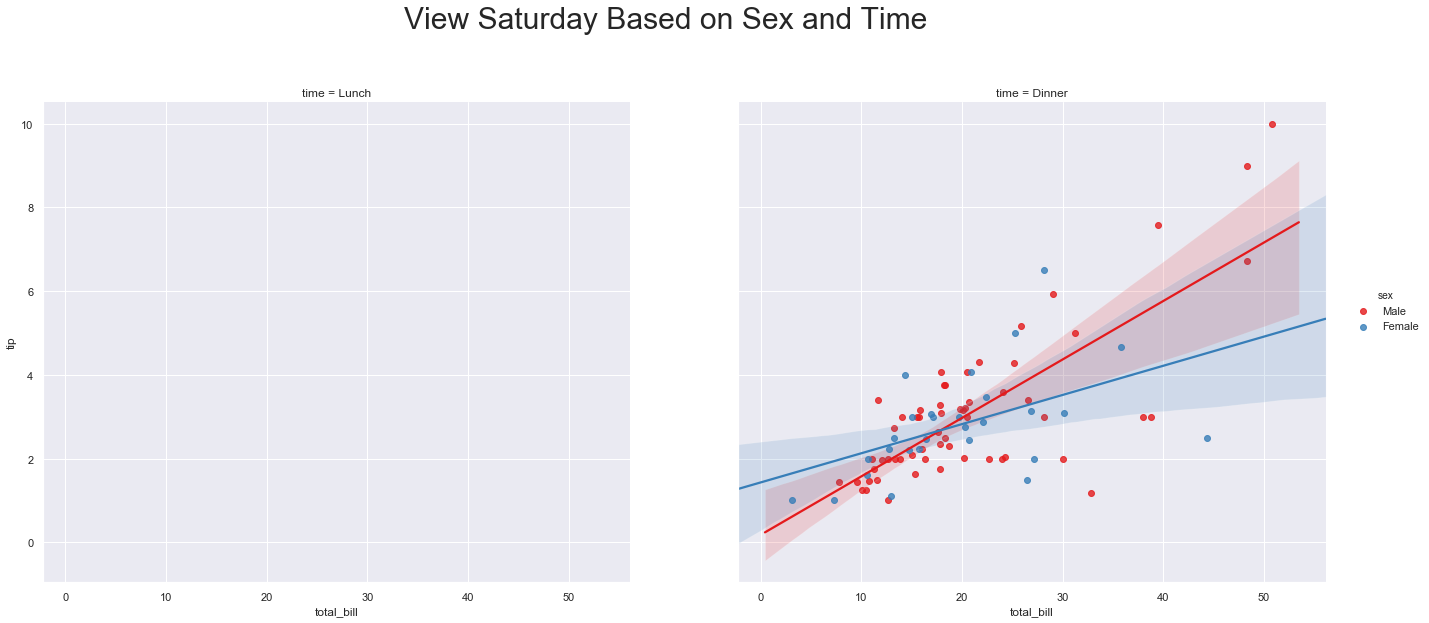

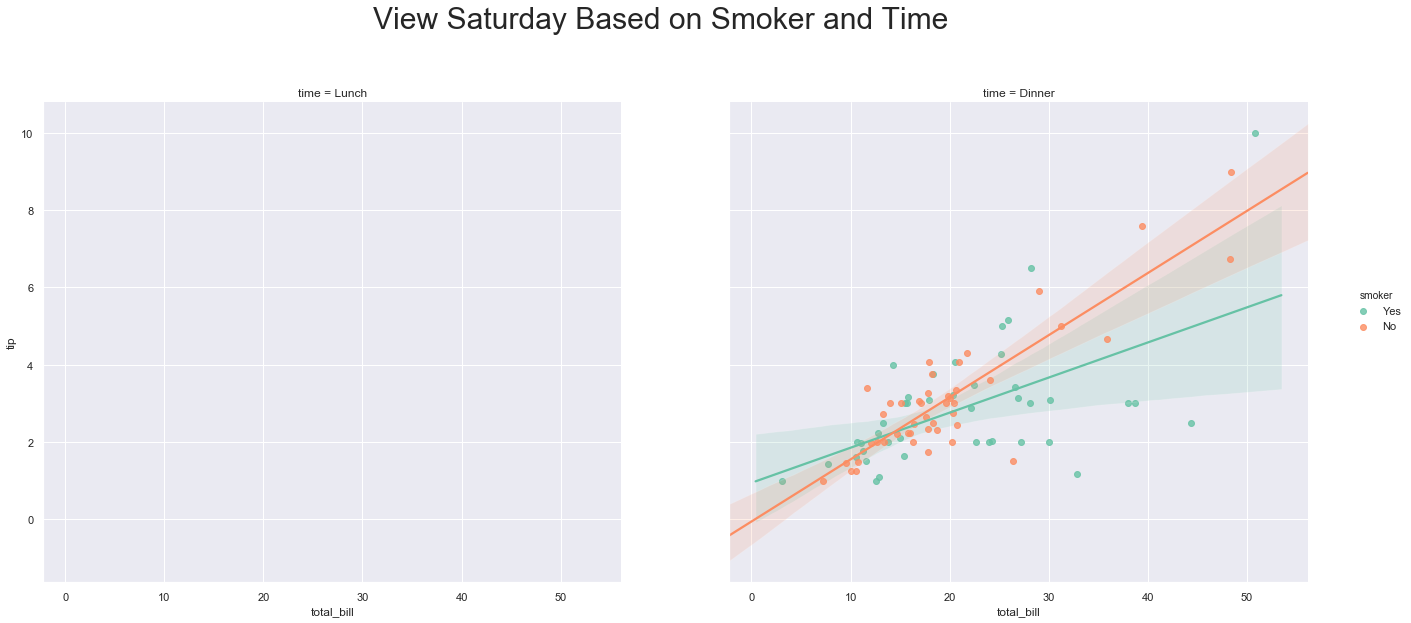

In [226]:
# Pull data on different days, plot one by one and investigate
sat = tips [tips ['day'] == "Sat"]

# Plot Saturday

plt.suptitle("Scatter Plot for Saturday", fontsize = 30) # Add Title
plt.xlabel("Total_Bill")               # Add Label
plt.ylabel("Tip")                      # Add Label
plt.xticks(fontsize=15, rotation=20)
plt.yticks(fontsize=15, rotation=20)

x1 = sat.iloc[:,1] # Use Column 1 (tip)
y1 = sat.iloc[:,0] # Use column 0 (total_bill)


#  linear relationship as determined using regplot
saturday = sns.regplot(y1,x1)



##inear regression using lmplot

# lmplot to view data on Saturday based on sex and time
sns.lmplot(x="total_bill", y="tip", hue ="sex", data=sat, col="time", palette="Set1", height=10, 
           aspect=1).fig.suptitle("View Saturday Based on Sex and Time ",fontsize=30)
plt.tight_layout(8) # Add space between plots
 
# lmplot to view data on Saturday based on smoker and time
sns.lmplot(x="total_bill", y="tip", hue ="smoker", data=sat, col="time", palette="Set2", height=10, 
           aspect=1).fig.suptitle("View Saturday Based on Smoker and Time", fontsize=30)
plt.tight_layout(8) # Add space between plots

plt.show()

In [228]:
# 
print(sat.groupby(["sex", "time", "size"])["time"].count().unstack().fillna(0))

size             1     2     3     4    5
sex    time                              
Male   Dinner  0.0  34.0  13.0  11.0  1.0
Female Dinner  2.0  19.0   5.0   2.0  0.0


We can see that people had food on Saturday for dinner only. 


Indicate that the restaurant is closed during lunch?

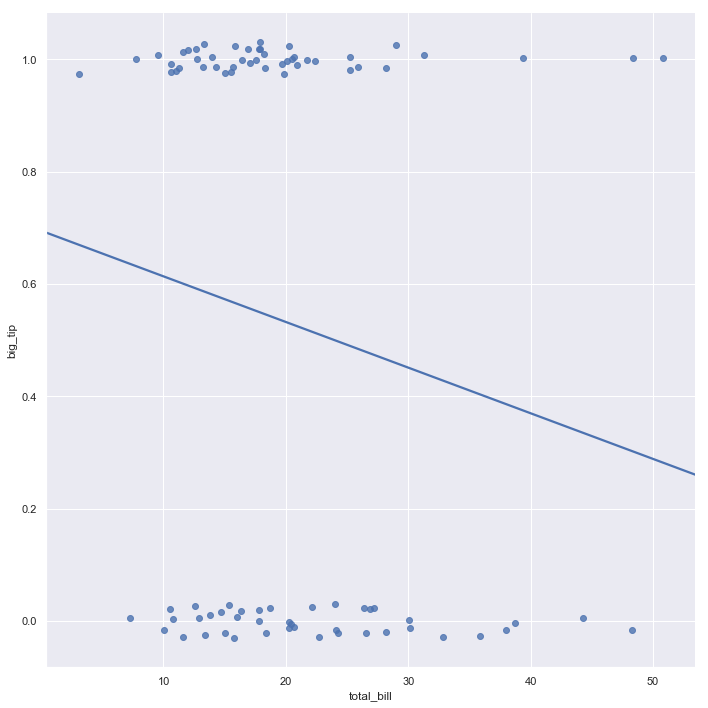

In [229]:
# Used lmplot to view a logistic regression model for a dinary dependent variable. 

tips["big_tip"] = (sat.tip / sat.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", y_jitter=.03, data=tips, height=10, aspect=1, ci=None)
plt.show()

## Sunday

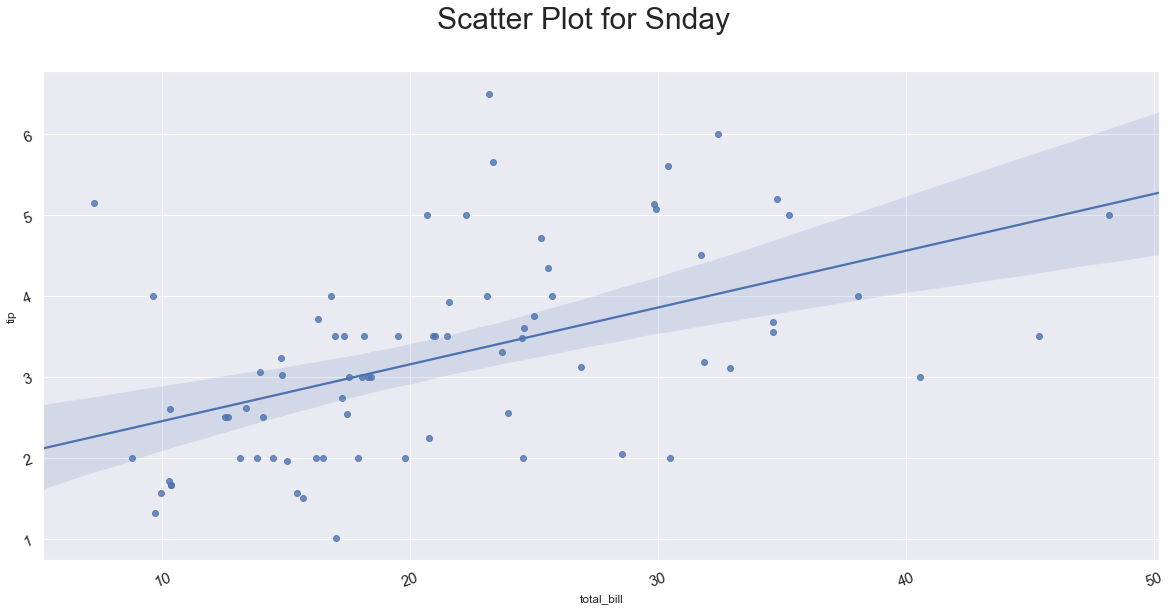

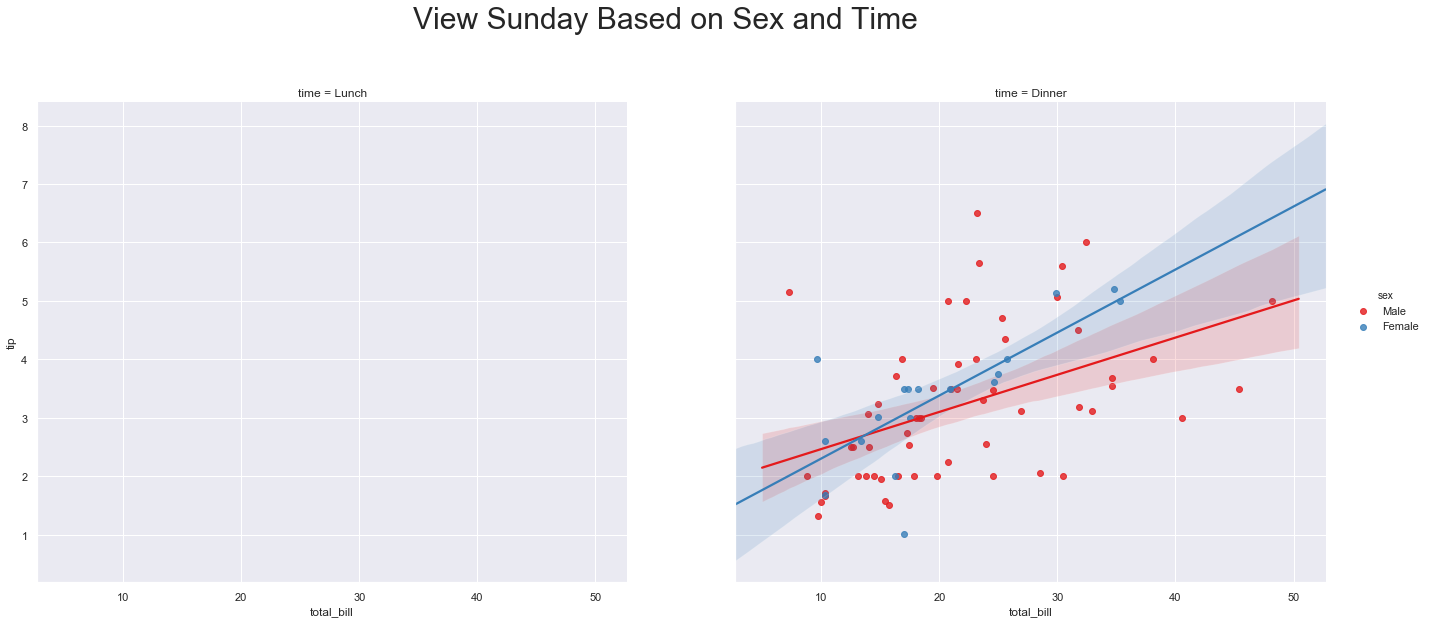

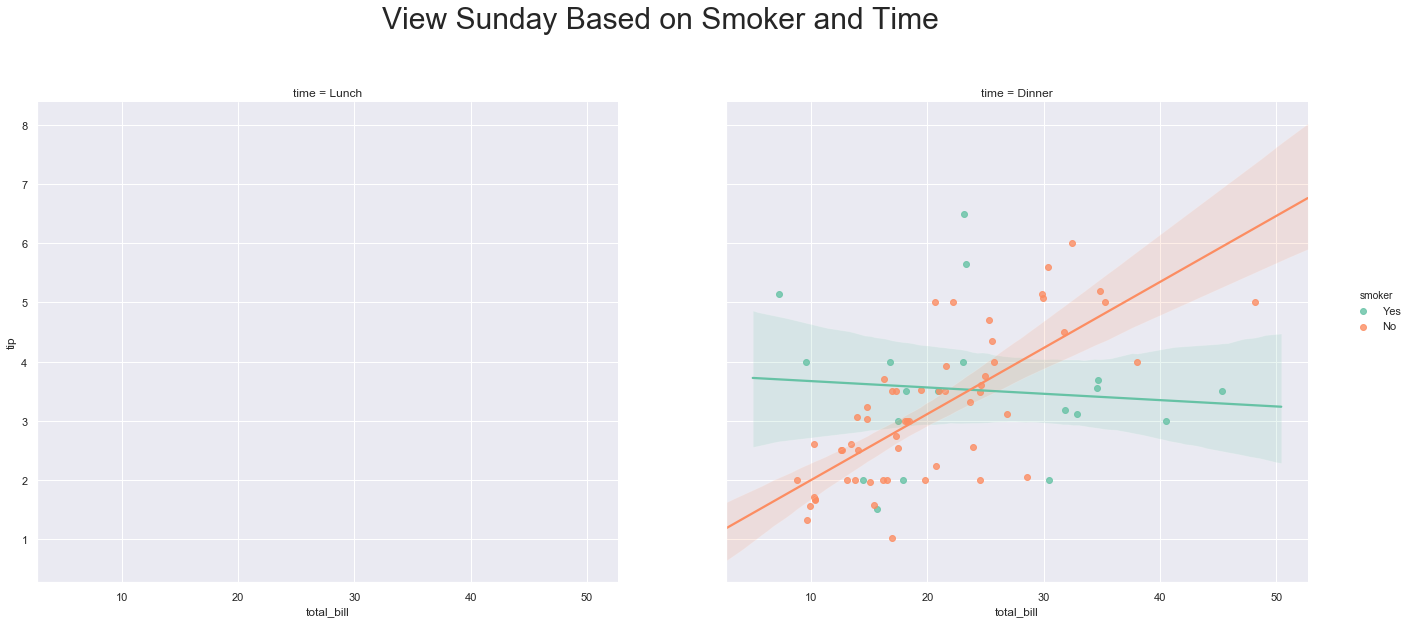

In [230]:
# Pull data on different days, plot one by one and investigate
sun = tips [tips ['day'] == "Sun"]

# Plot Sunday

plt.suptitle("Scatter Plot for Snday", fontsize = 30) # Add Title
plt.xlabel("Total_Bill")               # Add Label
plt.ylabel("Tip")                      # Add Label
plt.xticks(fontsize=15, rotation=20)
plt.yticks(fontsize=15, rotation=20)

x1 = sun.iloc[:,1] # Use Column 1 (tip)
y1 = sun.iloc[:,0] # Use column 0 (total_bill)


#  linear relationship as determined using regplot
sunday = sns.regplot(y1,x1)



## Linear regression using lmplot

# lmplot to view data on Sunday based on sex and time
sns.lmplot(x="total_bill", y="tip", hue ="sex", data=sun, col="time", palette="Set1", height=10, 
           aspect=1).fig.suptitle("View Sunday Based on Sex and Time ",fontsize=30)
plt.tight_layout(8) # Add space between plots
 
# lmplot to view data on Sunday based on smoker and time
sns.lmplot(x="total_bill", y="tip", hue ="smoker", data=sun, col="time", palette="Set2", height=10, 
           aspect=1).fig.suptitle("View Sunday Based on Smoker and Time", fontsize=30)
plt.tight_layout(8) # Add space between plots

plt.show()

In [232]:
# 
print(sun.groupby(["sex", "time", "size"])["time"].count().unstack().fillna(0))

size              2    3     4    5    6
sex    time                             
Male   Dinner  32.0  9.0  14.0  2.0  1.0
Female Dinner   7.0  6.0   4.0  1.0  0.0


We can see that people had food on Sunday for dinner only. 


Indicate that the restaurant is closed during lunch?

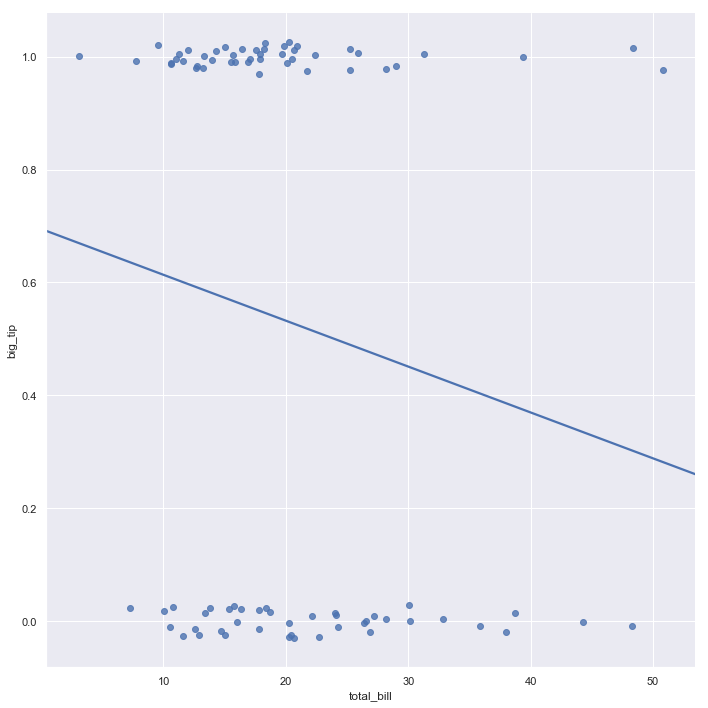

In [231]:
# Used lmplot to view a logistic regression model for a dinary dependent variable. 

tips["big_tip"] = (sat.tip / sat.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", y_jitter=.03, data=tips, height=10, aspect=1, ci=None)
plt.show()

# All days togteher 

In [ ]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

In [ ]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

In [ ]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg");